# Notebook 13: Macroscopic Quantum Electrodynamics: Describing real cavities

In this tutorial we will examine how Macroscopic Quantum Electrodynamics can be used to calculate realistic cavity parameters for experimentally relevant cavity setups. Optional exercises are provided, which you should attempt only after completing all other exercises.

NOTE FOR THE PAIR REVIEW PROCESS: Question 9.2.3 is still work in progress.

## Q. 1: Material properties

The mode structure of a given cavity - and therefore also the resulting coupling strength of an emitter to the field - is intricately related to the geometry and material composition of the cavity. Let's therefore first discuss the dielectric properties of different types of materials. 

### Q. 9.1

Write python functions to calculate and plot the Drude model of metals and the Lorentz oscillator model of dielectrics, respectively:
\begin{align}
    \epsilon_\mathrm{Drude}(\omega) = 1 - \frac{\omega_p^2}{\omega^2 +i\gamma\omega},
\end{align}

\begin{align}
    \epsilon_\mathrm{Lorentz}(\omega) = 1 + \sum_i\frac{s_i}{\omega_{0,i}^2 - \omega^2 +i\gamma\omega},
\end{align}

As an approximation, we can will assume that the dielectric can be represented by a single oscillator,
\begin{align}
    \epsilon_\mathrm{Lorentz}(\omega) = 1 + \frac{s_\mathrm{eff}}{\omega_{\mathrm{gap}}^2 - \omega^2 +i\gamma\omega},
\end{align}


##### Q. 9.1.1
Write a function that takes the plasma frequency and damping rate as input and makes a plot of the Drude dielectric function for $\omega_p = 15.3$ eV and $\gamma = 0.5984$ eV.

* Discuss the role of the plasma frequency on the metalic behaviour of the metal. What happens at the plasma frequency? 

Text(0, 0.5, '$\\epsilon_\\mathrm{Drude}$')

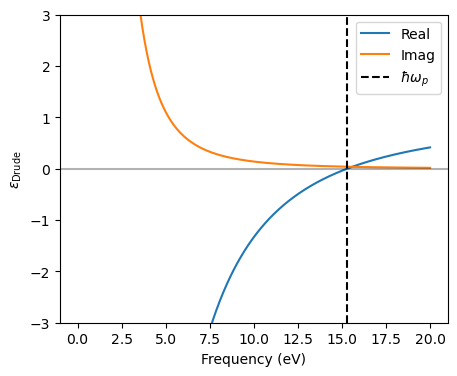

In [1]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

def drude_metal(omegas, wp, gamma):
    """
    Helper function to get the drude dielectric function
    """
    return 1 - (wp**2/(omegas**2 + 1j*omegas*gamma))

wp = 15.3
gamma = 0.5984

omegas = np.linspace(0.01, 20, 1000)

fig, ax = plt.subplots(1,1, figsize = (5,4))
ax.plot(omegas, np.real(drude_metal(omegas, wp, gamma)), label = "Real")
ax.plot(omegas, np.imag(drude_metal(omegas, wp, gamma)), label = "Imag")
ax.axvline(wp, linestyle = "--", color = "k", label = "$\hbar\omega_p$")
ax.axhline(0, color = "k", alpha = 0.3)
ax.legend()
ax.set_ylim([-3,3])
ax.set_xlabel('Frequency (eV)')
ax.set_ylabel("$\epsilon_\mathrm{Drude}$")

##### Q. 9.1.2
Write a function that takes the effective oscillator strength and damping rate as input. Make a plot of the Lorentz oscillator model dielectric function for a material with a bandgap of $\hbar\omega_\mathrm{gap} = 3$ eV, $\hbar\gamma = 0.08$ eV, and $s_\mathrm{eff} =2 \,\text{eV}^2$.

* What is the role of the bandgap on the dielectric properties of the dielectric?
* What happens when we change the damping rate?
* What happens when we change the oscillator strength?
* At what energy does the single oscillator approximation become problematic?


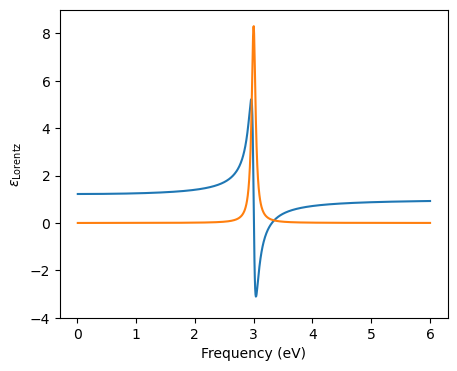

In [2]:
def get_lorentz_oscillator(omegas, seff, wgap, gamma):
    """
    Helper function to get the lorentz oscillator model dielectric function
    """
    return 1 + seff*1/((wgap**2 - omegas**2) - 1j*gamma*omegas)

wgap = 3
gamma = 0.08
seff = 2

omegas = np.linspace(0.01, 6, 1000)

fig, ax = plt.subplots(1,1, figsize = (5,4))
ax.plot(omegas, np.real(get_lorentz_oscillator(omegas, seff, wgap, gamma)))
ax.plot(omegas, np.imag(get_lorentz_oscillator(omegas, seff, wgap, gamma)))
ax.set_ylim([-4,9])
ax.set_xlabel('Frequency (eV)')
ax.set_ylabel("$\epsilon_\mathrm{Lorentz}$");

#### Q. 9.1.3

The following table shows the best fit of the Drude model for a series of common metals [4]:

| Element | $\omega_p$ (eV) | $\gamma$ (eV) |
|:--------:|:--------:|:--------:|
|  Ag   |  9.6   |  0.0228  |
|  Au   |  8.55   |  0.0184   |
|  Al   |  15.3   |  0.5984   |
|  Na   |  5.71   | 0.0276  |
|  K  |  3.72   |  0.0184   |


Plot the Drude metal function for the 5 metals and discuss the differences between them.


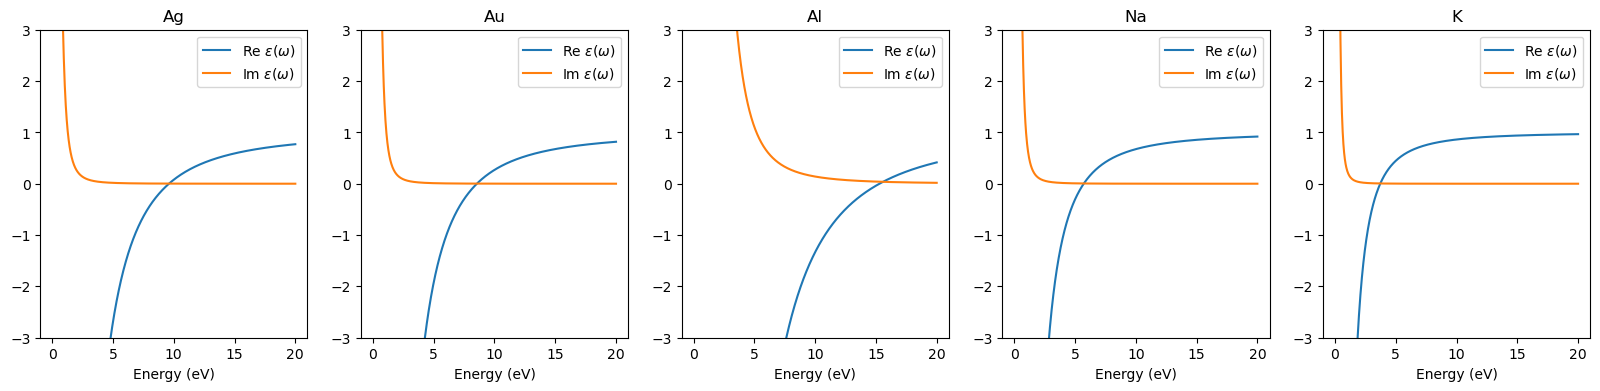

In [3]:
# Model parameters
omegas = np.linspace(0.01, 20, 1000)


metals = {}
metals['Ag'] = {'omega_p (eV)': 9.6, 'gamma_intra': 0.0228}
metals['Au'] = {'omega_p (eV)': 8.55, 'gamma_intra': 0.0184}
metals['Al'] = {'omega_p (eV)': 15.3, 'gamma_intra': 0.5984}
metals['Na'] = {'omega_p (eV)': 5.71, 'gamma_intra': 0.0276}
metals['K'] = {'omega_p (eV)': 3.72, 'gamma_intra': 0.0184}



fig, ax = plt.subplots(1,5, figsize = (20,4))
for i, metal in enumerate(metals):
    ax[i].plot(omegas, np.real(drude_metal(omegas, metals[metal]['omega_p (eV)'], metals[metal]['gamma_intra'])), label = "Re $\epsilon(\omega)$")
    ax[i].plot(omegas, np.imag(drude_metal(omegas, metals[metal]['omega_p (eV)'], metals[metal]['gamma_intra'])), label = "Im $\epsilon(\omega)$")

    ax[i].legend()
    ax[i].set_title(metal)
    ax[i].set_ylim([-3,3])
    ax[i].set_xlabel('Energy (eV)')


**Optional:** Within the Drude model, the plasma frequency of gold is 8.55 eV which corrosponds to 145 nm. 

* Is this consistent with the yellow-ish color of gold?
* What is the physical mechanism that the Drude model is missing?

## Q. 9.2 The field of spherical nano cavities

As a first example of a cavity, we consider a spherical setup consisting of two spherical layers: the spherical core with radius $R$ is filled with vacuum (permittivity $\epsilon = 1$), which is surrounded by a metal described by a Drude permittivity $\epsilon_\mathrm{Drude}$. We assume that this metal shell fills all of space except for the vacuum core, which means that we neglect the finite thickness of a realistic spherical cavity. While one can straightforwardly use macroscopic QED to go beyond this approximation, we will, for simplicity, not do so here.

For this geometry, we can expand the dyadic Green function evaluated inside the cavity (inside the vacuum core) in terms of vector spherical harmonics, as you have seen during the lecture (the details you can find in Refs. [1-3]). At the center of the spherical cavity ($\mathbf{r}= \mathbf{r}^\prime = 0$), only the $n = 1$ transverse magnetic mode is of importance. Consequently, the dyadic Green function at $\mathbf{r}= \mathbf{r}^\prime = 0$ can be written as:
\begin{align}
\boldsymbol{G}(\boldsymbol{r},\boldsymbol{r'},\omega)|_{r,r'\rightarrow 0} = \frac{i \omega}{6\pi c}[1 + r^\mathrm{TM}_{n=1}(\omega)]\boldsymbol{I}.
\end{align}
Here, $r^\mathrm{TM}_{n=1}(\omega)$ is the reflection coefficient for the lowest order transverse magnetic mode, which can be expressed as:
\begin{align}
r^\mathrm{TM}_{n=1}(\omega) = \frac{\left[i + \rho(n(\omega) + 1) - i\rho^2n(\omega) - \frac{\rho^3n(\omega)^2}{n(\omega)+1}\right]e^{i\rho}}{\mathrm{sin}\rho - \rho(\mathrm{cos}\rho + in(\omega)\mathrm{sin}\rho) + i\rho^2n(\omega)\mathrm{cos}\rho - \rho^3(\mathrm{cos}\rho - in(\omega)\mathrm{sin}\rho)\frac{n(\omega)^2}{n(\omega)^2 - 1}},
\end{align}
where $n(\omega) = \sqrt{\epsilon(\omega)}$ is the refractive index and $\rho = R\omega/c$ is the standard size parameter from Mie theory.

#### Q. 9.2.1

To investigate how the mode structure of the photon field depends on the geometry and material parameters, please do the following:
* Write a function that calculates the xx-component of the Dyadic Green's Function at $r=r'=0$ and plot the spectral density given by the imaginary part of the Green tensor for a Aluminium spherical cavity of radius $R = 800$ nm.
* How does the mode structure depend on the radius of the cavity?
* How does the width of the modes relate to the losses in the metalic shell?
* Does the width of the resonances depend on the radius? If so, can you explain why?
* How is the loss of reflectivity at the plasma frequency manifested in the mode structure?


In [4]:
def get_reflection_coefficient(rho, n):
        """
        Function to get the reflection coefficient for the 
        lowest order TM mode of the cavity
        """
        numerator = np.exp(1j*rho)*(1j + rho*(n +1) - 1j*rho**2*n - rho**3*n**2/(n+1))
        denominator = np.sin(rho) - rho*(np.cos(rho) + 1j*n*np.sin(rho)) + 1j*rho**2*n*np.cos(rho) - rho**3*(np.cos(rho) - 1j*n*np.sin(rho))*n**2/(n**2-1)

        r22p = numerator/denominator

        return r22p


In [5]:
c = 3E8

def get_imG(omega, R, n):
    # Calculating size paramters
    rho = R*omega/c
    # Reflection coefficient for lowest order TM mode
    r22p = get_reflection_coefficient(rho, n)

    return omega/(6*np.pi*c)*(1 + np.real(r22p))

Text(0.5, 1.0, 'Aluminium shell')

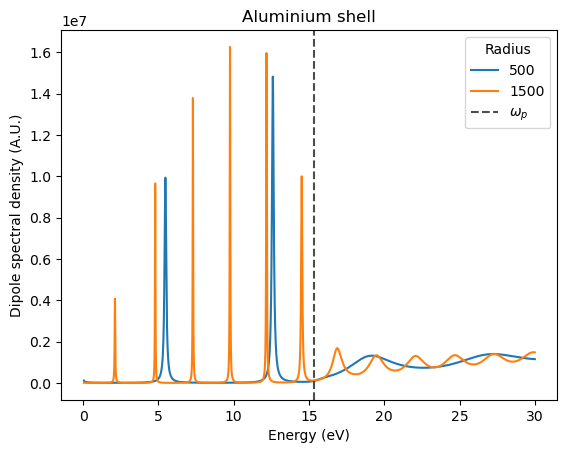

In [6]:
omegas = np.linspace(0.05,30, 10000)*2.417E14 # Converting to Hz


for R in np.array([500, 1500])*1E-9:
    eps_drude = drude_metal(omegas, metals['Al']['omega_p (eV)']*2.417E14, metals['Al']['gamma_intra']*2.417E14)
    spec = get_imG(omegas, R, np.sqrt(eps_drude))
    plt.plot(omegas/2.417E14, spec, label = '{r:0.0f}'.format(r=R*1E9))

plt.axvline(metals['Al']['omega_p (eV)'], linestyle = "--", color = "k", alpha = 0.7, label = "$\omega_p$")
plt.legend(title = "Radius")
plt.xlabel('Energy (eV)')
plt.ylabel('Dipole spectral density (A.U.)')
plt.title('Aluminium shell')


#### Q. 9.2.2

Next, plot and investigate the impact of the material parameters on the spectral density by plotting the spectral density for cavities made of the different realistic metals listed in the table above for fixed radius $R = 1500$ nm.

* Why are the resonances of the spherical cavity different for different metals shells when the cavity has the same radius?
* Can you explain the trend of the width and frequencies of the resonances by relating them to the parameters of the different metals?

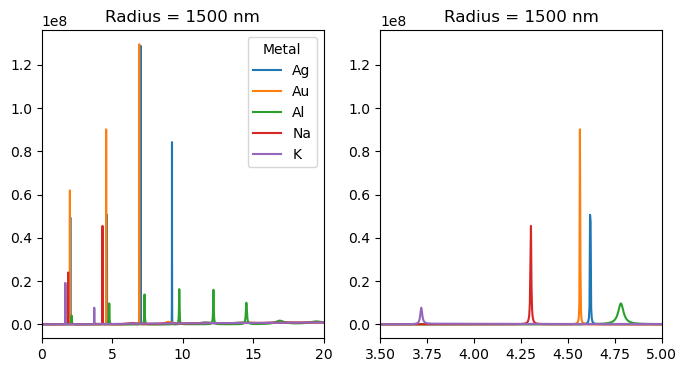

In [7]:
R = 1500E-9

fig, ax = plt.subplots(1,2, figsize = (8,4))
for metal in ['Ag', 'Au', 'Al', 'Na', 'K']: 
    eps_drude = drude_metal(omegas, metals[metal]['omega_p (eV)']*2.417E14, metals[metal]['gamma_intra']*2.417E14)
    spec = get_imG(omegas, R, np.sqrt(eps_drude))
    ax[0].plot(omegas/2.417E14, spec, label = metal)
    ax[1].plot(omegas/2.417E14, spec, label = metal)


ax[0].legend(title = "Metal")
ax[0].set_title('Radius = {r:0.0f} nm'.format(r=R*1E9))
ax[1].set_title('Radius = {r:0.0f} nm'.format(r=R*1E9))

ax[1].set_xlim([3.5,5])
ax[0].set_xlim([0,20]);

### Q. 9.2.3

Next, we consider the field in close proximity to a small metallic or dielectric sphere. This means, we again have a spherical two-layer system, but now the inner layer is given by a Drude or Lorentz permittivity and the outer layer is just vacuum. 

In this case, the Green tensor is given by (see Refs. [1-3] for details):

**Work in progress** 

## Q. 9.3: Group discussion - Translate the mode structures into a single-mode model

Imagine now that there is an emitter in the center of a spherical cavity or in close proximitty to a metallic sphere coupled to the electromagnetic field. 
* From what you have learned in the lecture: How can you reduce the coupling of the emitter to the continuum of frequencies of the field to an effective single-mode model? Discuss how you can determine the coupling strength to the emitter, frequency and decay rate of that single photonic mode using the spectral densities computed above? 
* Evaluate qualitatively the validity of the single-mode description in the different scenarios considered above.

## **Optional:** Using realistic cavity parameters in a real calculation

In this final part, we will use our new knowledge of MQED to include realistic cavity parameters in a realistic model of a coupled light-matter system. In principle, what we have done above allows us to parameterize (determine the coupling strength, frequency and decay write of the photon modes) any coupled cavity field-matter model that you have seen during the school that uses the PZW representation of the field.

* Choose the cavity setup of your preference from the ones analyzed above for which you think that a single-mode description is possible. Use the calculated spectral density to determine the effective coupling strength and frequency of the corresponding single cavity mode. Use this result to study the cavity-induced changes in the matter using, e.g. the Casida exercise.

# Bibliography

[1] W. C. Chew, Waves and fields in inhomogenous media, Vol. 16 (John Wiley & Sons, New York, 1999).

[2] L. W. Li, P. S. Kooi, M. S. Leong, and T. S. Yee. Electromagnetic dyadic Green's function in spherically multilayered media. IEEE Transactions on Microwave Theory and Techniques 42, 2302-2310 (1994).

[3] S. Scheel and S. Y. Buhmann, “Macroscopic QED-concepts and applications,” Acta Physica Slovaca 58, 675–809 (2008).

[4] Blaber, Martin G. et. al. "Search for the ideal plasmonic nanoshell: the effects of surface scattering and alternatives to gold and silver." The Journal of Physical Chemistry C 113.8 (2009): 3041-3045.